# Setup

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
import os

import numpy as np
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Load Model

Replace the following paths with the paths to your saved model

In [ ]:
path_to_load_json = ""
path_to_load_model = ""

In [ ]:
# load json and create model
json_file = open(path_to_load_json, "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(path_to_load_model)
print("Loaded model from disk")

Loaded model from disk


# Load data

Load data to do some visualizations on it. Remember to upload your kaggle API access token to the notebook

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d johnowhitaker/opencities-masked-256

opencities-masked-256.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip '/content/opencities-masked-256.zip'

Archive:  /content/opencities-masked-256.zip
replace mid_train/data/images-256/acc_665946_0_19_261799_253906.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
image_path1 = "/content/mid_train/data/images-256/"
image_path2 = "/content/mini_train/data/images-256/"
all_image_paths = [image_path1 + file for file in os.listdir(image_path1)] + [
    image_path2 + file for file in os.listdir(image_path2)
]

In [ ]:
label_path1 = "/content/mid_train/data/masks-256/"
label_path2 = "/content/mini_train/data/masks-256/"
all_masks_paths = [label_path1 + file for file in os.listdir(label_path1)] + [
    label_path2 + file for file in os.listdir(label_path2)
]

In [ ]:
all_images_paths = sorted(all_image_paths)
all_masks_paths = sorted(all_masks_paths)

In [ ]:
IMAGE_SIZE = 256


def open_images(paths):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = np.mean(image, axis=-1) / 255.0
        images.append(image)
    return np.array(images)

In [ ]:
all_images = open_images(all_images_paths)
all_masks = open_images(all_masks_paths)

In [ ]:
sample_images = all_images[:10]
sample_masks = all_masks[:10]

In [ ]:
i = sample_images
j = sample_masks

# Do some predictions on the data

In [ ]:
pre = loaded_model.predict(sample_images.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1))

In [ ]:
pre[pre > 0.5] = 1
pre[pre <= 0.5] = 0

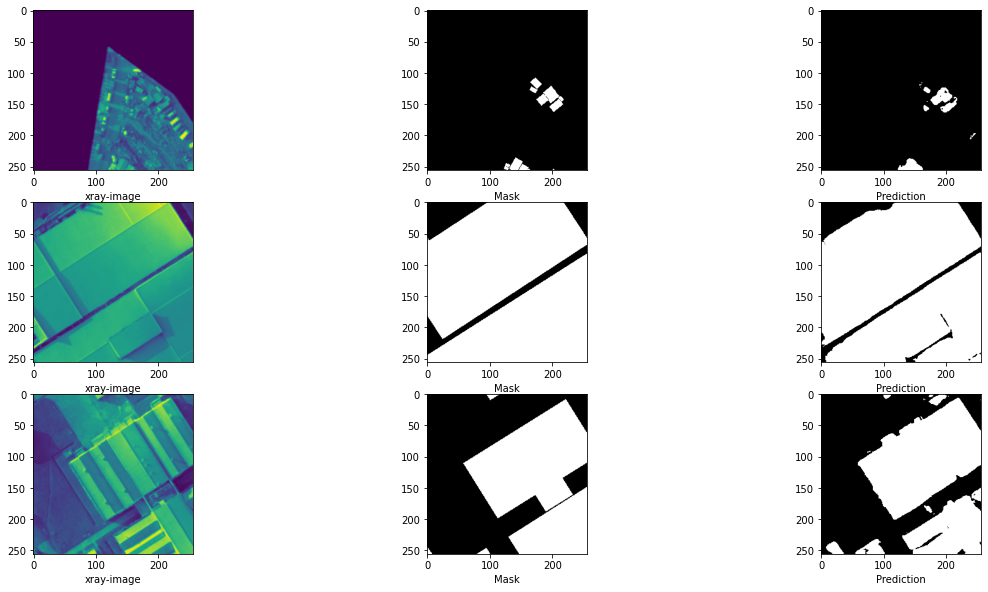

In [ ]:
plt.figure(figsize=(20, 10))
for x in range(0, 9, 3):
    plt.subplot(3, 3, x + 1)

    plt.xlabel("xray-image")
    plt.imshow(np.squeeze(i[x]))

    plt.subplot(3, 3, x + 2)
    plt.xlabel("Mask")
    plt.imshow(np.squeeze(j[x]), cmap="gray")

    plt.subplot(3, 3, x + 3)
    plt.xlabel("Prediction")
    plt.imshow(np.squeeze(pre[x]), cmap="gray")

# How Do We Perform on HOT Provided Data?

In [ ]:
images_path = "/content/gdrive/MyDrive/Omdena/data/from_hot/2/"
masks_path = "/content/gdrive/MyDrive/Omdena/data/rasterized_labels/2/"
temp = [images_path + file for file in os.listdir(images_path)]
masks_path_to_test = [masks_path + file for file in os.listdir(masks_path)]
images_path_to_test = [path for path in temp if path.endswith(".png")]

In [ ]:
images_path_to_test

['/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309612-261634-19.png',
 '/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309609-261634-19.png',
 '/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309610-261634-19.png',
 '/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309610-261633-19.png',
 '/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309611-261633-19.png',
 '/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309609-261632-19.png',
 '/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309612-261633-19.png',
 '/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309610-261632-19.png',
 '/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309612-261632-19.png',
 '/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309611-261632-19.png',
 '/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309609-261633-19.png',
 '/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309611-261634-19.png']

In [ ]:
images_path_to_test = sorted(images_path_to_test)
masks_path_to_test = sorted(masks_path_to_test)

In [ ]:
images_path_to_test[:5]

['/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309609-261632-19.png',
 '/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309609-261633-19.png',
 '/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309609-261634-19.png',
 '/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309610-261632-19.png',
 '/content/gdrive/MyDrive/Omdena/data/from_hot/2/OAM-309610-261633-19.png']

In [ ]:
masks_path_to_test[:5]

['/content/gdrive/MyDrive/Omdena/data/rasterized_labels/2/OAM-309609-261632-19-label.png',
 '/content/gdrive/MyDrive/Omdena/data/rasterized_labels/2/OAM-309609-261633-19-label.png',
 '/content/gdrive/MyDrive/Omdena/data/rasterized_labels/2/OAM-309609-261634-19-label.png',
 '/content/gdrive/MyDrive/Omdena/data/rasterized_labels/2/OAM-309610-261632-19-label.png',
 '/content/gdrive/MyDrive/Omdena/data/rasterized_labels/2/OAM-309610-261633-19-label.png']

In [ ]:
images_to_test = open_images(images_path_to_test)
masks_path_to_test = open_images(masks_path_to_test)

In [ ]:
i = images_to_test
j = masks_path_to_test

In [ ]:
pre = loaded_model.predict(images_to_test.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1))

In [ ]:
pre[pre > 0.5] = 1
pre[pre <= 0.5] = 0

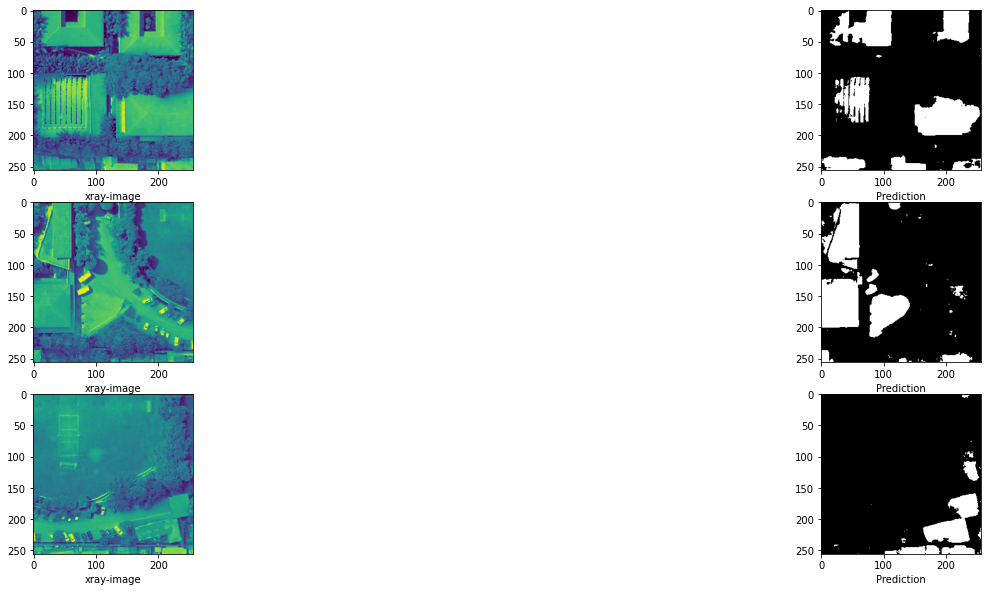

In [ ]:
plt.figure(figsize=(20, 10))
for x in range(0, 9, 3):
    plt.subplot(3, 3, x + 1)

    plt.xlabel("xray-image")
    plt.imshow(np.squeeze(i[x]))

    plt.subplot(3, 3, x + 3)
    plt.xlabel("Prediction")
    plt.imshow(np.squeeze(pre[x]), cmap="gray")